In [67]:
import tools.log_parser as log_parser
import tools.backtester as backtester
import sys
import datamodel
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

In [68]:
sns.set_theme(style="whitegrid")

In [69]:
LOG_PATH = "trader4_log.log"

LIMITS = backtester.KNOWN_LIMITS

In [70]:
log = log_parser.parse_log(LOG_PATH, parse_trader_log_as_object=True)
sandbox_logs = log.sandbox_logs
activity_df = log.activity_df

## Amethyst

In [71]:
AMETHYSTS = "AMETHYSTS"

In [72]:
activity_df.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss'],
      dtype='object')

In [73]:
amethyst_activity_df = activity_df[activity_df["product"] == AMETHYSTS]
amethyst_activity_df.describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,2000.0,2000.000000,2000.000000,2000.000000,1464.000000,1464.000000,351.000000,351.000000,2000.000000,2000.000000,1455.000000,1455.000000,302.000000,302.000000,2000.000000,2000.000000
mean,-2.0,99950.000000,9996.627000,8.436500,9995.301230,19.594945,9995.094017,22.897436,10003.480500,8.548500,10004.744330,20.197251,10004.947020,24.119205,10000.053750,592.755000
std,0.0,57749.458872,1.978593,10.266288,0.637278,10.342356,0.320256,7.325944,1.890081,10.409026,0.597387,9.811230,0.224366,6.179945,1.481328,350.306536
min,-2.0,0.000000,9995.000000,1.000000,9995.000000,1.000000,9995.000000,1.000000,9998.000000,1.000000,10000.000000,1.000000,10004.000000,1.000000,9996.500000,0.000000
25%,-2.0,49975.000000,9995.000000,1.000000,9995.000000,20.000000,9995.000000,22.000000,10004.000000,1.000000,10005.000000,20.000000,10005.000000,22.000000,10000.000000,278.500000
50%,-2.0,99950.000000,9996.000000,2.000000,9995.000000,24.000000,9995.000000,24.000000,10004.000000,2.000000,10005.000000,24.000000,10005.000000,25.000000,10000.000000,595.000000
75%,-2.0,149925.000000,9998.000000,20.000000,9995.000000,27.000000,9995.000000,28.000000,10005.000000,20.000000,10005.000000,27.000000,10005.000000,28.000000,10000.000000,892.000000
max,-2.0,199900.000000,10002.000000,30.000000,10000.000000,30.000000,9998.000000,30.000000,10005.000000,30.000000,10005.000000,30.000000,10005.000000,30.000000,10003.500000,1199.000000


Note: at least one bid/ask at any given time

c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


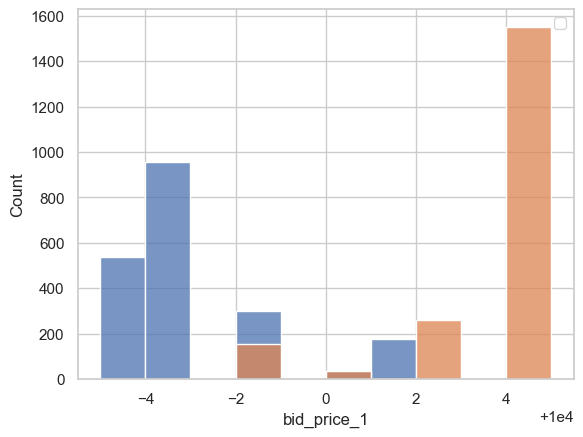

In [74]:
sns.histplot(amethyst_activity_df["bid_price_1"], binwidth=1)
sns.histplot(amethyst_activity_df["ask_price_1"], binwidth=1)
plt.legend()

c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bid_volume_1', ylabel='Count'>

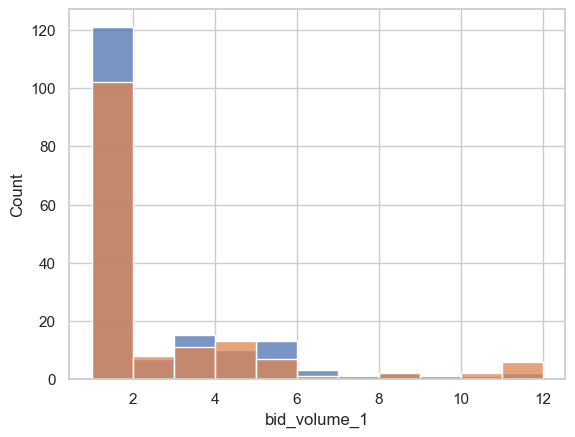

In [75]:
sns.histplot(amethyst_activity_df.query("bid_price_1 > 10000")["bid_volume_1"], binwidth=1)
sns.histplot(amethyst_activity_df.query("ask_price_1 < 10000")["ask_volume_1"], binwidth=1)

## Starfruit

In [76]:
STARFRUIT = "STARFRUIT"

In [77]:
starfruit_activity_df = activity_df[activity_df["product"] == STARFRUIT]
starfruit_activity_df.describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,2000.0,2000.000000,2000.000000,2000.00000,754.000000,754.000000,59.000000,59.000000,2000.000000,2000.000000,692.000000,692.000000,104.000000,104.000000,2000.000000,2000.0
mean,-2.0,99950.000000,4977.611000,17.23700,4976.948276,23.969496,4975.847458,24.661017,4982.993500,18.025000,4983.789017,22.109827,4984.634615,23.903846,4980.302250,0.0
std,0.0,57749.458872,14.282706,11.43933,14.117463,6.771189,14.744740,3.457177,14.322605,11.285037,14.451135,8.898662,13.852242,6.016997,14.271093,0.0
min,-2.0,0.000000,4948.000000,1.00000,4948.000000,1.000000,4950.000000,20.000000,4949.000000,1.000000,4955.000000,1.000000,4956.000000,1.000000,4948.500000,0.0
25%,-2.0,49975.000000,4964.000000,4.00000,4963.000000,22.000000,4961.000000,22.000000,4969.000000,4.000000,4970.000000,21.000000,4971.000000,21.750000,4966.000000,0.0
50%,-2.0,99950.000000,4982.000000,23.00000,4982.000000,25.000000,4982.000000,25.000000,4988.000000,23.000000,4989.000000,25.000000,4990.000000,24.500000,4985.500000,0.0
75%,-2.0,149925.000000,4989.000000,27.00000,4987.000000,28.000000,4986.500000,27.000000,4993.000000,27.000000,4995.000000,28.000000,4993.000000,27.250000,4991.000000,0.0
max,-2.0,199900.000000,5003.000000,32.00000,4999.000000,32.000000,4997.000000,32.000000,5006.000000,32.000000,5006.000000,32.000000,5005.000000,32.000000,5004.000000,0.0


c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


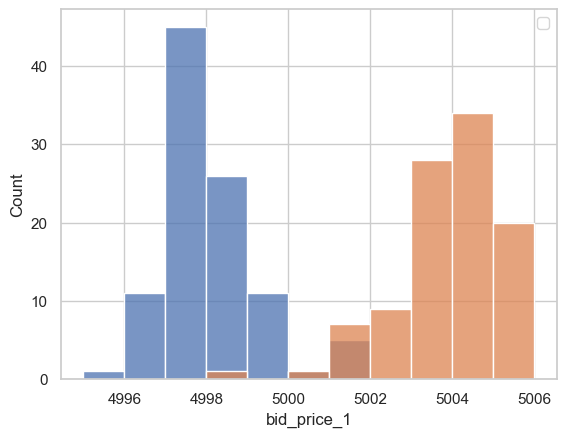

In [78]:
sns.histplot(starfruit_activity_df.query("timestamp < 10000")["bid_price_1"], binwidth=1)
sns.histplot(starfruit_activity_df.query("timestamp < 10000")["ask_price_1"], binwidth=1)
plt.legend()

<Axes: xlabel='timestamp'>

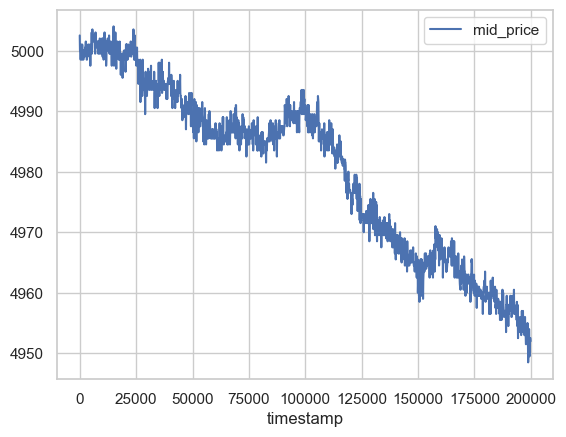

In [79]:
starfruit_mid_price = starfruit_activity_df.set_index("timestamp")[["mid_price"]]
starfruit_mid_price.plot()

<Axes: xlabel='timestamp'>

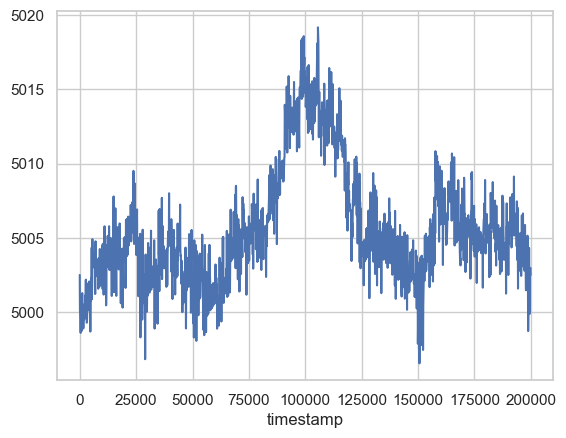

In [80]:
start_price = starfruit_mid_price.iloc[0]["mid_price"]
end_price = starfruit_mid_price.iloc[-1]["mid_price"]
time = starfruit_mid_price.index[-1]
starfruit_mid_price["adj_mid_price"] = starfruit_mid_price["mid_price"] + (start_price - end_price) * starfruit_mid_price.index / time
starfruit_mid_price["adj_mid_price"].plot()

In [81]:
import copy

def adjust_depth(depth, timestep):
    new_depth = {}
    for k, v in depth.items():
        k = int(k)
        v = int(v)
        new_depth[round(k + (start_price - end_price) * timestep / time)] = v
    return new_depth

def adjust_series(mask, series):
    return np.where(
        mask,
        (series + (start_price - end_price) * series.index / time).round(),
        series,
    )

adj_log = copy.deepcopy(log)
# also adjust logs
for sandbox_log in adj_log.sandbox_logs:
    trader_log = sandbox_log.trader_log
    for symbol, depth in trader_log.order_depths.items():
        if symbol == STARFRUIT:
            depth.buy_orders = adjust_depth(depth.buy_orders, trader_log.timestamp)
            depth.sell_orders = adjust_depth(depth.sell_orders, trader_log.timestamp)

mask = adj_log.activity_df["product"] == STARFRUIT
adj_log.activity_df.set_index("timestamp", inplace=True)
for col in ["bid_price_1", "bid_price_2", "bid_price_3", "ask_price_1", "ask_price_2", "ask_price_3", "mid_price"]:
    adj_log.activity_df[col] = adjust_series(mask, adj_log.activity_df[col])
adj_log.activity_df.reset_index(inplace=True)

    # log["depth"] = adjust_depth(log["depth"], log["timestamp"])

In [82]:
starfruit_mid_price

,mid_price,adj_mid_price
timestamp,,
0,5002.5,5002.500000
100,5000.0,5000.025263
200,5000.0,5000.050525
300,4999.5,4999.575788
400,4998.5,4998.601051
...,...,...
199500,4952.5,5002.898949
199600,4952.5,5002.924212
199700,4952.5,5002.949475


In [119]:
def calc_ema(series, alpha):
    # let's do something stupider
    cur = series.iloc[0]
    result = [cur]
    for value in series.iloc[1:]:
        cur = alpha * value + (1 - alpha) * cur
        result.append(cur)
    return pd.Series(result, index=series.index)
    # return series.ewm(span=20).mean()

starfruit_mid_price["ema_0.01"] = calc_ema(starfruit_mid_price["adj_mid_price"], alpha=0.01)
starfruit_mid_price["ema_0.1"] = calc_ema(starfruit_mid_price["adj_mid_price"], alpha=0.1)
display(starfruit_mid_price)

,mid_price,adj_mid_price,ema_0.01,ema_0.1,ema_diff,future_diff,future_diff10,pred,future_diff50
timestamp,,,,,,,,,
0,5002.5,5002.500000,5002.500000,5002.500000,0.000000,2.474737,3.747374,5002.500000,0.736868
100,5000.0,5000.025263,5002.475253,5002.252526,-0.225000,2.199475,0.972111,5003.896772,-0.038394
200,5000.0,5000.050525,5002.451005,5002.032326,-0.425250,2.449212,2.221848,5005.137399,0.211343
300,4999.5,4999.575788,5002.422253,5001.786672,-0.648247,3.171449,1.444086,5006.517014,-2.566419
400,4998.5,4998.601051,5002.384041,5001.468110,-0.936290,1.818937,1.091573,5008.297944,0.581068
...,...,...,...,...,...,...,...,...,...
199500,4952.5,5002.898949,5004.435391,5002.062412,-4.646616,-51.033386,NaN,4985.899345,NaN
199600,4952.5,5002.924212,5004.420279,5002.148592,-4.545324,-50.997731,NaN,4985.218909,NaN
199700,4952.5,5002.949475,5004.405571,5002.228680,-4.450528,-50.968168,NaN,4984.579922,NaN


In [120]:
starfruit_mid_price["ema_diff"] = starfruit_mid_price["ema_0.1"] - starfruit_mid_price["ema_0.01"]
starfruit_mid_price["future_diff"] = starfruit_mid_price["ema_0.1"] - starfruit_mid_price["adj_mid_price"].shift(-1)
starfruit_mid_price["future_diff10"] =  starfruit_mid_price["ema_0.1"] - starfruit_mid_price["adj_mid_price"].shift(-10)
starfruit_mid_price["future_diff50"] =  starfruit_mid_price["ema_0.1"] - starfruit_mid_price["adj_mid_price"].shift(-50)

In [121]:
starfruit_mid_price.head()

,mid_price,adj_mid_price,ema_0.01,ema_0.1,ema_diff,future_diff,future_diff10,pred,future_diff50
timestamp,,,,,,,,,
0,5002.5,5002.500000,5002.500000,5002.500000,0.000000,2.474737,3.747374,5002.500000,0.736868
100,5000.0,5000.025263,5002.475253,5002.252526,-0.222726,2.202001,0.974637,5003.896772,-0.035868
200,5000.0,5000.050525,5002.451005,5002.032326,-0.418679,2.456538,2.229175,5005.137399,0.218669
300,4999.5,4999.575788,5002.422253,5001.786672,-0.635581,3.185622,1.458258,5006.517014,-2.552247
400,4998.5,4998.601051,5002.384041,5001.468110,-0.915931,1.841797,1.114433,5008.297944,0.603928


In [122]:
starfruit_mid_price.corr()

,mid_price,adj_mid_price,ema_0.01,ema_0.1,ema_diff,future_diff,future_diff10,pred,future_diff50
mid_price,1.000000,0.052797,-0.177739,0.009220,0.317700,-0.055891,-0.066140,0.562471,-0.095649
adj_mid_price,0.052797,1.000000,0.782103,0.944052,0.556881,-0.061362,0.032812,-0.417280,0.220587
ema_0.01,-0.177739,0.782103,1.000000,0.864031,0.030967,0.089749,0.158821,-0.126641,0.372633
ema_0.1,0.009220,0.944052,0.864031,1.000000,0.529954,0.019013,0.096905,-0.403729,0.262307
ema_diff,0.317700,0.556881,0.030967,0.529954,1.000000,-0.113472,-0.075813,-0.588234,-0.110145
future_diff,-0.055891,-0.061362,0.089749,0.019013,-0.113472,1.000000,0.254870,0.066847,0.162135
future_diff10,-0.066140,0.032812,0.158821,0.096905,-0.075813,0.254870,1.000000,0.026626,0.318698
pred,0.562471,-0.417280,-0.126641,-0.403729,-0.588234,0.066847,0.026626,1.000000,0.044059
future_diff50,-0.095649,0.220587,0.372633,0.262307,-0.110145,0.162135,0.318698,0.044059,1.000000


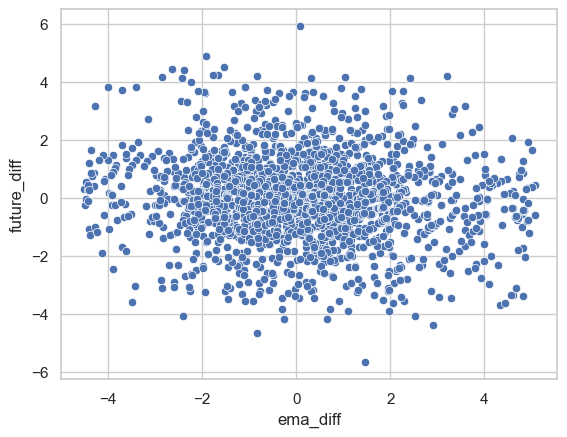

c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Axes: xlabel='timestamp', ylabel='mid_price'>

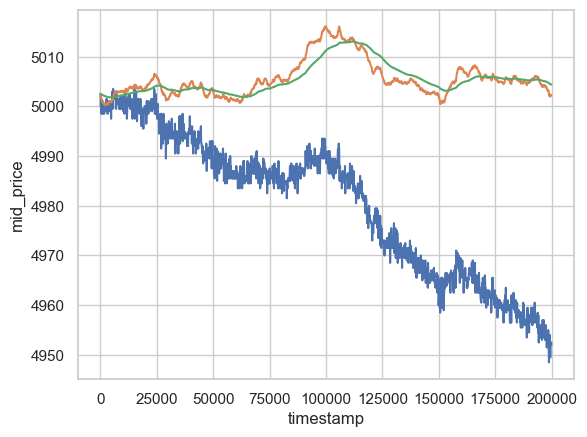

In [123]:
sns.scatterplot(data=starfruit_mid_price, x="ema_diff", y="future_diff")
plt.show()
sns.lineplot( data=starfruit_mid_price, x="timestamp", y="mid_price")
sns.lineplot( data=starfruit_mid_price, x="timestamp", y="ema_0.1")
sns.lineplot( data=starfruit_mid_price, x="timestamp", y="ema_0.01")

In [124]:
# print(np.linalg.lstsq(starfruit_mid_price[["ema_diff"]], starfruit_mid_price["future_diff"], rcond=None))

starfruit_truncated = starfruit_mid_price[starfruit_mid_price["future_diff50"].notna()]

starfruit_reg = LinearRegression(fit_intercept=False).fit(starfruit_truncated[["ema_diff"]], starfruit_truncated["future_diff50"])
starfruit_c = starfruit_reg.coef_[0]
starfruit_intercept = starfruit_reg.intercept_
print(starfruit_c, starfruit_intercept)

-0.1494608365891853 0.0


c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thien\miniconda3\envs\kaggle\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

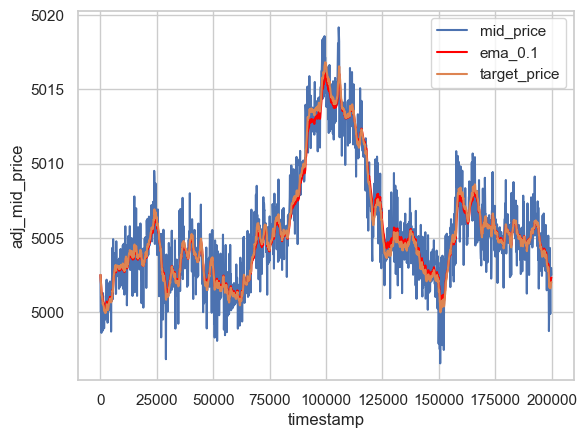

In [125]:
starfruit_pred = starfruit_reg.predict(starfruit_mid_price[["ema_diff"]])
starfruit_mid_price["pred"] = starfruit_mid_price["ema_0.1"] - starfruit_pred
# starfruit_mid_price["mid_price"].plot()
# starfruit_mid_price["pred"].plot()
sns.lineplot(data=starfruit_mid_price, x="timestamp", y="adj_mid_price", label="mid_price")
sns.lineplot(data=starfruit_mid_price, x="timestamp", y="ema_0.1", label="ema_0.1", color="red")
sns.lineplot(data=starfruit_mid_price, x="timestamp", y="pred", label="target_price")
plt.legend()
plt.show()

In [126]:
from datamodel import *
import jsonpickle
from dataclasses import dataclass

def starfruit_strategy(state: TradingState):
    @dataclass
    class Data:
        ema0_1: float
        ema0_01: float
        last_mid_price: float
    
    def sanitise_orders(orders):
        return [{"price": int(k), "qty": int(v)} for k, v in orders.items()]

    data_str = state.traderData
    if data_str == "":
        data = None
    else:
        data = jsonpickle.decode(data_str, classes=Data)

    symbol = STARFRUIT
    order_depths = state.order_depths[symbol]
    buy_orders = sanitise_orders(order_depths.buy_orders)
    sell_orders = sanitise_orders(order_depths.sell_orders)

    position = 0 if symbol not in state.position else state.position[symbol]
    max_buy = LIMITS[symbol] - position
    max_sell = position + LIMITS[symbol]

    # print(buy_orders, sell_orders)
    if len(buy_orders) > 0 and len(sell_orders) > 0:
        mid_price = (buy_orders[0]["price"] + sell_orders[0]["price"]) / 2
    else:
        if data is None:
            # No info!
            return {}, None, ""
        mid_price = data.last_mid_price
    
    if data is None:
        data = Data(
            ema0_1=mid_price,
            ema0_01=mid_price,
            last_mid_price=mid_price
        )

    data.ema0_1 = 0.1 * mid_price + 0.9 * data.ema0_1
    data.ema0_01 = 0.01 * mid_price + 0.99 * data.ema0_01

    ema_diff = data.ema0_1 - data.ema0_01
    pred_future_diff = ema_diff * starfruit_c + starfruit_intercept
    
    target_price = data.ema0_1 - pred_future_diff
    # print(ema_diff, pred_future_diff, target_price)

    orders = {symbol: []}

    for order in sell_orders:
        if max_buy <= 0:
            break
        if order["price"] < target_price:
            qty = min(max_buy, abs(order["qty"]))
            orders[symbol].append(Order(symbol, order["price"], qty)) # buy
            max_buy -= qty

    for order in buy_orders:
        if max_sell <= 0:
            break
        if order["price"] > target_price:
            qty = min(max_sell, abs(order["qty"]))
            orders[symbol].append(Order(symbol, order["price"], -qty))
            max_sell -= qty
    
    # some market making
    if max_buy > 0:
        orders[symbol].append(Order(symbol, round(target_price - 1), max_buy))
    if max_sell > 0:
        orders[symbol].append(Order(symbol, round(target_price + 1), -max_sell))

    data.last_mid_price = mid_price

    return orders, None, jsonpickle.encode(data)
    

In [127]:
import tools.backtester as backtester

print(backtester.backtest(starfruit_strategy, log))
print(backtester.backtest(starfruit_strategy, adj_log))

BacktestResults(balance=-68728, position={'STARFRUIT': 14}, profit=600.0)
BacktestResults(balance=-84033, position={'STARFRUIT': 17}, profit=1001.0)
